    x          y
0  24  21.549452
1  50  47.464463
2  15  17.218656
3  38  36.586398
4  87  87.288984


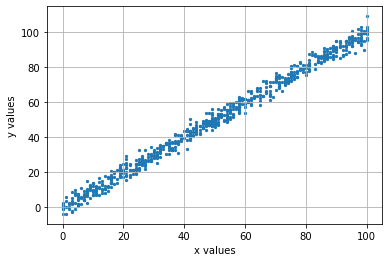

iteration: 0 cost:  743.4332672935938
iteration: 400 cost:  3.9352561522452425
iteration: 800 cost:  3.935237092273996
iteration: 1200 cost:  3.9352228867692007
iteration: 1600 cost:  3.9352133946778878
iteration: 2000 cost:  3.9352084781935135
iteration: 2400 cost:  3.935208002687018
iteration: 2800 cost:  3.9352118366393762
iteration: 3200 cost:  3.9352198515754337
iteration: 3600 cost:  3.935231921999221
iteration: 4000 cost:  3.9352479253304566
iteration: 4400 cost:  3.9352677418424733
iteration: 4800 cost:  3.93529125460133
iteration: 5200 cost:  3.9353183494062476
iteration: 5600 cost:  3.935348914731231
iteration: 6000 cost:  3.9353828416678653
iteration: 6400 cost:  3.93542002386934
iteration: 6800 cost:  3.9354603574955958


In [18]:
import pandas as pd                         
data = pd.read_csv("train.csv")               
print(data.head())  

X = data['x']; Y = data['y']
X = X.tolist()
Y = Y.tolist()

import matplotlib.pyplot as plt
plt.scatter(X, Y, s = 5)
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()


#alpha - learning rate
def gradient_descent(X, Y, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(X)
    for i in range(N):
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))
        dl_db += -1*(Y[i] - (w*X[i] + b))
    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha
    return w, b


def cost_function (X, Y, w, b):
    N = len(X)
    total_error = 0.0
    for i in range(N):
        total_error += (Y[i] - (w*X[i] - b))**2
    return total_error / (2*float(N))
    


def train(X, Y, w, b, alpha, n_iter):
    for i in range(n_iter):
        w, b = gradient_descent(X, Y, w, b, alpha)
        if i % 400 == 0:
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b))
    return w, b

def predict(x, w, b):
	return x*w + b


w, b = train(X, Y, 0.0, 0.0, 0.0001, 7000)


0      76.927524
1      20.976809
2      21.975929
3      19.977689
4      35.963607
         ...    
295    70.932804
296    45.954807
297    54.946886
298    61.940725
299    46.953926
Name: x, Length: 300, dtype: float64


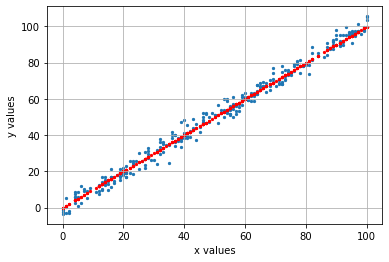

In [19]:
data_test = pd.read_csv("test.csv")               
y_pred = predict(data_test['x'], w, b)
print(y_pred)
X = data_test['x'].tolist()
Y = y_pred.tolist()
X1 = data_test['x'].tolist()
Y1 = data_test['y'].tolist()
plt.scatter(X1, Y1, s = 5)
plt.scatter(X, Y, s = 5,color='r')
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [20]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
explained_variance_score(Y1, Y)

0.9888977969302104

In [21]:
mean_absolute_error(Y1, Y)

2.418092098599599

In [22]:
r2_score(Y1, Y)

0.9887778032283946